In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# tensorflow 2.0
from tensorflow.keras.models import load_model  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense       
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.0.0


In [2]:
# Read CSV file
df = pd.read_csv('./pima.csv',
            names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
print(type(df))
print(df.head(5))
print(df.info())

data = np.loadtxt('./pima.csv', delimiter=",")
print(type(data))
print(data.shape)

# Train data
x = data[0:568, 0:8] # 0 ~ 567, 0 ~ 7
y = data[0:568, 8:]   # 0 ~ 567, 8
print(x.shape)
print(y.shape)

# Validation data
x_val = data[568:668, 0:8] # 568 ~ 667, 0 ~ 7
y_val = data[568:668, 8:]  # 568 ~ 667, 8
print(x_val.shape)
print(y_val.shape)

# Test data
x_test = data[668:, 0:8] # 668 ~ , 0 ~ 7
y_test = data[668:, 8:]  # 668 ~ , 8
print(x_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
<class 'numpy.ndarray'>
(768, 9)
(568, 8)


In [3]:
model = Sequential()

# Avoid Overfit => Reduce network 
# model.add(Dense(128, input_dim=8, activation='relu')) 
# model.add(Dense(64, activation='relu')) 
model.add(Dense(36, input_dim=8, activation='relu')) 
model.add(Dense(20, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy']) 

# stop learning when min error occured 20 times
stop_point = EarlyStopping(monitor='loss', patience=20)

hist = model.fit(x, y, validation_data=(x_val, y_val),
                 epochs=1000, batch_size=10, callbacks=[stop_point])

Train on 568 samples, validate on 100 samples
Epoch 1/1000
568/568 [==============================] - 1s 2ms/sample - loss: 1.7696 - accuracy: 0.5528 - val_loss: 0.7618 - val_accuracy: 0.5200
Epoch 2/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.6657 - accuracy: 0.6268 - val_loss: 0.7379 - val_accuracy: 0.6500
Epoch 3/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.6654 - accuracy: 0.6461 - val_loss: 0.7059 - val_accuracy: 0.5800
Epoch 4/1000
568/568 [==============================] - 0s 174us/sample - loss: 0.6389 - accuracy: 0.6496 - val_loss: 0.6819 - val_accuracy: 0.5800
Epoch 5/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.6038 - accuracy: 0.6778 - val_loss: 0.6908 - val_accuracy: 0.6100
Epoch 6/1000
568/568 [==============================] - 0s 157us/sample - loss: 0.6366 - accuracy: 0.6567 - val_loss: 0.6817 - val_accuracy: 0.6200
Epoch 7/1000
568/568 [==============================] - 0s 165us/sam

568/568 [==============================] - 0s 274us/sample - loss: 0.5076 - accuracy: 0.7500 - val_loss: 0.6246 - val_accuracy: 0.6900
Epoch 56/1000
568/568 [==============================] - 0s 231us/sample - loss: 0.5137 - accuracy: 0.7676 - val_loss: 0.5838 - val_accuracy: 0.6800
Epoch 57/1000
568/568 [==============================] - 0s 241us/sample - loss: 0.5085 - accuracy: 0.7447 - val_loss: 0.5702 - val_accuracy: 0.7400
Epoch 58/1000
568/568 [==============================] - 0s 176us/sample - loss: 0.5485 - accuracy: 0.7218 - val_loss: 0.5942 - val_accuracy: 0.7000
Epoch 59/1000
568/568 [==============================] - 0s 183us/sample - loss: 0.5172 - accuracy: 0.7430 - val_loss: 0.6294 - val_accuracy: 0.6900
Epoch 60/1000
568/568 [==============================] - 0s 142us/sample - loss: 0.5052 - accuracy: 0.7447 - val_loss: 0.5687 - val_accuracy: 0.7000
Epoch 61/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.4986 - accuracy: 0.7606 - val_loss: 0

Epoch 110/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.4760 - accuracy: 0.7782 - val_loss: 0.5876 - val_accuracy: 0.7600
Epoch 111/1000
568/568 [==============================] - 0s 169us/sample - loss: 0.4564 - accuracy: 0.7799 - val_loss: 0.5690 - val_accuracy: 0.7600
Epoch 112/1000
568/568 [==============================] - 0s 169us/sample - loss: 0.4617 - accuracy: 0.7676 - val_loss: 0.6452 - val_accuracy: 0.7000
Epoch 113/1000
568/568 [==============================] - 0s 160us/sample - loss: 0.4523 - accuracy: 0.7835 - val_loss: 0.6645 - val_accuracy: 0.7200
Epoch 114/1000
568/568 [==============================] - 0s 167us/sample - loss: 0.4567 - accuracy: 0.7799 - val_loss: 0.5894 - val_accuracy: 0.7000
Epoch 115/1000
568/568 [==============================] - 0s 166us/sample - loss: 0.4416 - accuracy: 0.7817 - val_loss: 0.6281 - val_accuracy: 0.7400
Epoch 116/1000
568/568 [==============================] - 0s 162us/sample - loss: 0.4587 - accuracy:

568/568 [==============================] - 0s 167us/sample - loss: 0.4228 - accuracy: 0.7940 - val_loss: 0.6855 - val_accuracy: 0.6600
Epoch 165/1000
568/568 [==============================] - 0s 171us/sample - loss: 0.4184 - accuracy: 0.8151 - val_loss: 0.8079 - val_accuracy: 0.7200
Epoch 166/1000
568/568 [==============================] - 0s 169us/sample - loss: 0.4349 - accuracy: 0.8063 - val_loss: 0.7373 - val_accuracy: 0.7100
Epoch 167/1000
568/568 [==============================] - 0s 162us/sample - loss: 0.4253 - accuracy: 0.7905 - val_loss: 0.6742 - val_accuracy: 0.7500
Epoch 168/1000
568/568 [==============================] - 0s 146us/sample - loss: 0.4592 - accuracy: 0.7711 - val_loss: 0.7034 - val_accuracy: 0.6600
Epoch 169/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.4272 - accuracy: 0.8011 - val_loss: 0.6560 - val_accuracy: 0.7100
Epoch 170/1000
568/568 [==============================] - 0s 152us/sample - loss: 0.4305 - accuracy: 0.7799 - val_l

Epoch 219/1000
568/568 [==============================] - ETA: 0s - loss: 0.3976 - accuracy: 0.79 - 0s 137us/sample - loss: 0.3856 - accuracy: 0.8099 - val_loss: 0.6925 - val_accuracy: 0.6700
Epoch 220/1000
568/568 [==============================] - 0s 137us/sample - loss: 0.3916 - accuracy: 0.8257 - val_loss: 0.8020 - val_accuracy: 0.6700
Epoch 221/1000
568/568 [==============================] - 0s 146us/sample - loss: 0.3885 - accuracy: 0.8204 - val_loss: 0.7413 - val_accuracy: 0.6500
Epoch 222/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.3804 - accuracy: 0.8099 - val_loss: 0.8142 - val_accuracy: 0.7000
Epoch 223/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.3750 - accuracy: 0.8239 - val_loss: 0.7579 - val_accuracy: 0.6600
Epoch 224/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.3763 - accuracy: 0.8099 - val_loss: 0.7926 - val_accuracy: 0.7100
Epoch 225/1000
568/568 [==============================] - 

568/568 [==============================] - 0s 175us/sample - loss: 0.3630 - accuracy: 0.8187 - val_loss: 0.6894 - val_accuracy: 0.6600
Epoch 274/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.3526 - accuracy: 0.8380 - val_loss: 0.7618 - val_accuracy: 0.6900
Epoch 275/1000
568/568 [==============================] - 0s 164us/sample - loss: 0.3563 - accuracy: 0.8292 - val_loss: 0.7721 - val_accuracy: 0.6800
Epoch 276/1000
568/568 [==============================] - 0s 161us/sample - loss: 0.3653 - accuracy: 0.8239 - val_loss: 0.7615 - val_accuracy: 0.6800
Epoch 277/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.3487 - accuracy: 0.8504 - val_loss: 0.8351 - val_accuracy: 0.6600
Epoch 278/1000
568/568 [==============================] - 0s 165us/sample - loss: 0.3505 - accuracy: 0.8327 - val_loss: 0.7822 - val_accuracy: 0.7000
Epoch 279/1000
568/568 [==============================] - 0s 137us/sample - loss: 0.3474 - accuracy: 0.8363 - val_l

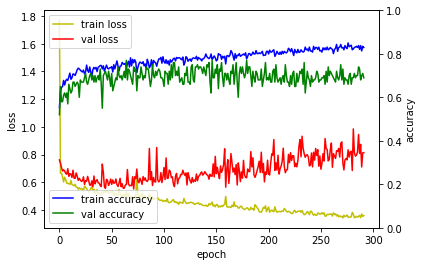

In [4]:
fig, loss_ax = plt.subplots()

# double y-axis
acc_ax = loss_ax.twinx() 

# y-axis (left)
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# y-axis (right)
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# axis labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('Loss:', test_loss, '/ACC:', (test_acc*100), '%')

손실값: 0.6738691703352915 /정확도: 68.99999976158142 %


In [10]:
from tensorflow.keras import regularizers 

model2 = Sequential()

model2.add(Dense(128, input_shape=(8, ), activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model2.add(Dense(64, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


model2.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy']) 

# stop learning when min error occured 20 times
stop_point2 = EarlyStopping(monitor='loss', patience=20)

hist2 = model2.fit(x, y, validation_data=(x_val, y_val),
                 epochs=1000, batch_size=10, callbacks=[stop_point2])

Train on 568 samples, validate on 100 samples
Epoch 1/1000
568/568 [==============================] - 1s 1ms/sample - loss: 1.7559 - accuracy: 0.6144 - val_loss: 1.7139 - val_accuracy: 0.5500
Epoch 2/1000
568/568 [==============================] - 0s 187us/sample - loss: 1.5230 - accuracy: 0.6250 - val_loss: 1.5928 - val_accuracy: 0.5400
Epoch 3/1000
568/568 [==============================] - 0s 188us/sample - loss: 1.2650 - accuracy: 0.6602 - val_loss: 1.2147 - val_accuracy: 0.6800
Epoch 4/1000
568/568 [==============================] - 0s 187us/sample - loss: 1.1915 - accuracy: 0.6567 - val_loss: 1.1885 - val_accuracy: 0.6800
Epoch 5/1000
568/568 [==============================] - 0s 181us/sample - loss: 1.1640 - accuracy: 0.6725 - val_loss: 1.1522 - val_accuracy: 0.6700
Epoch 6/1000
568/568 [==============================] - 0s 183us/sample - loss: 1.1262 - accuracy: 0.6778 - val_loss: 1.1480 - val_accuracy: 0.6500
Epoch 7/1000
568/568 [==============================] - 0s 183us/sam

Epoch 56/1000
568/568 [==============================] - 0s 205us/sample - loss: 0.6874 - accuracy: 0.7447 - val_loss: 0.7682 - val_accuracy: 0.6300
Epoch 57/1000
568/568 [==============================] - 0s 198us/sample - loss: 0.6941 - accuracy: 0.7289 - val_loss: 0.7327 - val_accuracy: 0.6600
Epoch 58/1000
568/568 [==============================] - 0s 201us/sample - loss: 0.6924 - accuracy: 0.7201 - val_loss: 0.7467 - val_accuracy: 0.7100
Epoch 59/1000
568/568 [==============================] - 0s 201us/sample - loss: 0.6858 - accuracy: 0.7342 - val_loss: 0.7017 - val_accuracy: 0.7200
Epoch 60/1000
568/568 [==============================] - 0s 201us/sample - loss: 0.6948 - accuracy: 0.7042 - val_loss: 0.7358 - val_accuracy: 0.6200
Epoch 61/1000
568/568 [==============================] - 0s 202us/sample - loss: 0.6849 - accuracy: 0.7271 - val_loss: 0.7218 - val_accuracy: 0.6900
Epoch 62/1000
568/568 [==============================] - 0s 202us/sample - loss: 0.6594 - accuracy: 0.7447

Epoch 111/1000
568/568 [==============================] - 0s 181us/sample - loss: 0.5459 - accuracy: 0.7553 - val_loss: 0.5952 - val_accuracy: 0.7800
Epoch 112/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.5299 - accuracy: 0.7658 - val_loss: 0.6289 - val_accuracy: 0.6800
Epoch 113/1000
568/568 [==============================] - 0s 178us/sample - loss: 0.5246 - accuracy: 0.7817 - val_loss: 0.6084 - val_accuracy: 0.7300
Epoch 114/1000
568/568 [==============================] - 0s 189us/sample - loss: 0.5570 - accuracy: 0.7394 - val_loss: 0.6056 - val_accuracy: 0.7400
Epoch 115/1000
568/568 [==============================] - 0s 182us/sample - loss: 0.5514 - accuracy: 0.7588 - val_loss: 0.6603 - val_accuracy: 0.7000
Epoch 116/1000
568/568 [==============================] - 0s 183us/sample - loss: 0.5578 - accuracy: 0.7588 - val_loss: 0.6087 - val_accuracy: 0.7300
Epoch 117/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.5366 - accuracy:

568/568 [==============================] - 0s 181us/sample - loss: 0.4834 - accuracy: 0.7905 - val_loss: 0.5671 - val_accuracy: 0.7700
Epoch 166/1000
568/568 [==============================] - 0s 178us/sample - loss: 0.4626 - accuracy: 0.7975 - val_loss: 0.5875 - val_accuracy: 0.7400
Epoch 167/1000
568/568 [==============================] - 0s 176us/sample - loss: 0.4630 - accuracy: 0.7923 - val_loss: 0.6076 - val_accuracy: 0.7800
Epoch 168/1000
568/568 [==============================] - 0s 176us/sample - loss: 0.4867 - accuracy: 0.7975 - val_loss: 0.5730 - val_accuracy: 0.7700
Epoch 169/1000
568/568 [==============================] - 0s 178us/sample - loss: 0.4637 - accuracy: 0.8046 - val_loss: 0.5895 - val_accuracy: 0.7400
Epoch 170/1000
568/568 [==============================] - 0s 178us/sample - loss: 0.5082 - accuracy: 0.7817 - val_loss: 0.5495 - val_accuracy: 0.7500
Epoch 171/1000
568/568 [==============================] - 0s 179us/sample - loss: 0.4718 - accuracy: 0.8046 - val_l

Epoch 220/1000
568/568 [==============================] - 0s 187us/sample - loss: 0.4262 - accuracy: 0.8081 - val_loss: 0.6052 - val_accuracy: 0.7400
Epoch 221/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.4184 - accuracy: 0.8116 - val_loss: 0.6541 - val_accuracy: 0.7600
Epoch 222/1000
568/568 [==============================] - 0s 192us/sample - loss: 0.4377 - accuracy: 0.8187 - val_loss: 0.6378 - val_accuracy: 0.7700
Epoch 223/1000
568/568 [==============================] - 0s 195us/sample - loss: 0.4292 - accuracy: 0.8081 - val_loss: 0.6540 - val_accuracy: 0.7200
Epoch 224/1000
568/568 [==============================] - 0s 188us/sample - loss: 0.4357 - accuracy: 0.8134 - val_loss: 0.6024 - val_accuracy: 0.7500
Epoch 225/1000
568/568 [==============================] - 0s 183us/sample - loss: 0.4458 - accuracy: 0.8028 - val_loss: 0.6202 - val_accuracy: 0.7900
Epoch 226/1000
568/568 [==============================] - 0s 180us/sample - loss: 0.4236 - accuracy:

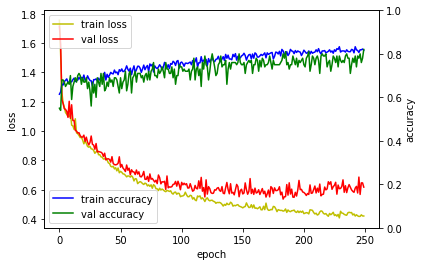

In [11]:
fig, loss_ax = plt.subplots()

# double y-axis
acc_ax = loss_ax.twinx() 

# y-axis (left)
loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label='val loss')

# y-axis (right)
acc_ax.plot(hist2.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist2.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# axis labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()